# Setup

## Look around

In [1]:
%ls

colab_extended_GPflow_pipeline.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_ci_gp.ipynb
colab_reproducing_ci_rf.ipynb
colab_reproducing_grid_search_pipeline.ipynb
eda.ipynb
visualise_extended_grid_search_results.ipynb
visualise_reproducing_grid_search_results.ipynb


In [2]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

## Import Modules

### Standard imports

In [3]:
import json
import pickle

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [4]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [5]:
# root = '../backup_results'
root = '../results'

In [6]:
dataset = 'esol'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'extended'
assert grid_search_type in ['reproducing', 'extended']

# correlated features treatment
if dataset == 'esol':
    cf = 'reduced'
else:
    cf = 'full'
assert cf in ['reduced', 'full']

In [7]:
# experiment
cf = 'full'

## Titles, Units and Labels for datasets

In [8]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [9]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [10]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


## CHOOSE metric to display

In [11]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [12]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [13]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

### Sklearn

In [14]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores_{cf}.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores_{cf}.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params_{cf}.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

# with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params_{cf}.pickle', 'rb') as fp:
#     params = pickle.load(fp)

In [15]:
# best_params

Have a look at best parameters.

In [16]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 850, 'rf__max_features': 0.1},
 'xgb': {'xgb__subsample': 0.5,
  'xgb__n_estimators': 300,
  'xgb__max_depth': 9,
  'xgb__learning_rate': 0.2},
 'krr': {'krr__alpha': 0.01},
 'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [17]:
# val_scores

In [18]:
# train_test_scores

### GPflow

In [19]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_gp_tanimoto_val_scores.pickle', 'rb') as fp:
    gpflow_val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_gp_tanimoto_train_test_scores.pickle', 'rb') as fp:
    gpflow_train_test_scores = pickle.load(fp)

In [20]:
# gpflow_val_scores

### Get means and standard deviations

#### Scikit-Learn

Get the means over folds (`cross_validate()` records the results as arrays even for `num_folds=1`)

In [21]:
scores = val_scores
mean_val_scores = {features: {model: {record: np.abs(scores[features][model][record].mean()) for record in scores[features][model]} for model in scores[features]} for features in scores}
std_val_scores = {features: {model: {record: scores[features][model][record].std() for record in scores[features][model]} for model in scores[features]} for features in scores}

# mean_val_scores
# std_val_scores

In [22]:
scores = train_test_scores
mean_train_test_scores = {features: {model: {record: np.abs(scores[features][model][record].mean()) for record in scores[features][model]} for model in scores[features]} for features in scores}
std_train_test_scores = {features: {model: {record: scores[features][model][record].std() for record in scores[features][model]} for model in scores[features]} for features in scores}

# mean_train_test_scores
# std_train_test_scores

#### GPflow

In [23]:
scores = gpflow_val_scores
gpflow_mean_val_scores = {features: {record: np.abs(scores[features][record]).mean() for record in scores[features]} for features in scores}
gpflow_std_val_scores = {features: {record: np.array(scores[features][record]).std() for record in scores[features]} for features in scores}

# gpflow_mean_val_scores
# gpflow_std_val_scores

In [24]:
scores = gpflow_train_test_scores
gpflow_mean_train_test_scores = {features: {record: np.abs(scores[features][record]).mean() for record in scores[features]} for features in scores}
gpflow_std_train_test_scores = {features: {record: np.array(scores[features][record]).std() for record in scores[features]} for features in scores}

# gpflow_mean_train_test_scores
# gpflow_std_train_test_scores

# Visualization

## Plotting options

In [25]:
mean_val_scores.keys()

dict_keys(['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6', '1024ecfp-4 + RDKit', '1024ecfp-6 + RDKit', '2048ecfp-4 + RDKit', '2048ecfp-6 + RDKit'])

In [26]:
column_order = ['RDKit',
                '1024ecfp-4', '1024ecfp-4 + RDKit',
                '1024ecfp-6', '1024ecfp-6 + RDKit',
                '2048ecfp-4', '2048ecfp-4 + RDKit',
                '2048ecfp-6', '2048ecfp-6 + RDKit'
                ]

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'GP-sklearn', 'GP-GPflow']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'GP-sklearn',
    'gpflow': 'GP-GPflow'
}

## Train metric

In [27]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.23,0.48,0.46,0.47,0.45,0.23,0.24,0.23,0.23
xgb,0.03,0.28,0.56,0.46,0.22,0.30,0.13,0.03,0.15
krr,0.09,0.26,0.17,0.25,0.17,0.06,0.04,0.07,0.03
gp,0.18,1.17,1.18,1.31,0.19,0.25,0.22,0.27,0.27


In [28]:
gpflow_train_metric = {features: {'gpflow': gpflow_mean_train_test_scores[features][f'train_{metric}']} for features in gpflow_mean_train_test_scores}
for features in train_metric:
    if features not in gpflow_train_metric:
        gpflow_train_metric[features] = {}
        gpflow_train_metric[features]['gpflow'] = None
gpflow_train_metric = pd.DataFrame(gpflow_train_metric)[train_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_train_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,0.37,0.27,0.36,0.26,None,None,None,None


In [29]:
combined_train_metric = pd.concat([train_metric, gpflow_train_metric])
combined_train_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.23,0.48,0.46,0.47,0.45,0.23,0.24,0.23,0.23
xgb,0.03,0.28,0.56,0.46,0.22,0.30,0.13,0.03,0.15
krr,0.09,0.26,0.17,0.25,0.17,0.06,0.04,0.07,0.03
gp,0.18,1.17,1.18,1.31,0.19,0.25,0.22,0.27,0.27
gpflow,NaN,0.37,0.27,0.36,0.26,NaN,NaN,NaN,NaN


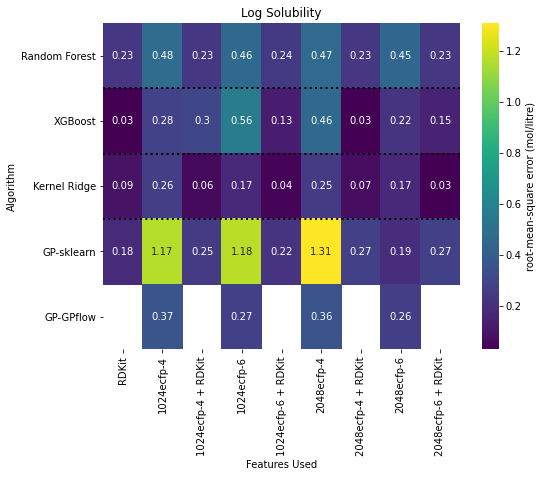

In [30]:
df = combined_train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

### Scikit-Learn

In [31]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.60,1.24,1.26,1.23,1.25,0.60,0.61,0.60,0.61
xgb,0.55,1.20,1.20,1.19,1.22,0.58,0.57,0.59,0.60
krr,0.82,1.83,1.77,1.86,2.06,1.39,1.32,1.46,1.71
gp,0.60,1.62,1.59,1.71,1.91,0.79,0.75,0.84,0.92


### GPflow

In [32]:
gpflow_val_metric = {features: {'gpflow': gpflow_mean_val_scores[features][f'test_{metric}']} for features in gpflow_mean_val_scores}
for features in val_metric:
    if features not in gpflow_val_metric:
        gpflow_val_metric[features] = {}
        gpflow_val_metric[features]['gpflow'] = None
gpflow_val_metric = pd.DataFrame(gpflow_val_metric)[val_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_val_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,1.01,1.05,1.0,1.02,None,None,None,None


### Combined

In [33]:
combined_val_metric = pd.concat([val_metric, gpflow_val_metric])
combined_val_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.60,1.24,1.26,1.23,1.25,0.60,0.61,0.60,0.61
xgb,0.55,1.20,1.20,1.19,1.22,0.58,0.57,0.59,0.60
krr,0.82,1.83,1.77,1.86,2.06,1.39,1.32,1.46,1.71
gp,0.60,1.62,1.59,1.71,1.91,0.79,0.75,0.84,0.92
gpflow,NaN,1.01,1.05,1.00,1.02,NaN,NaN,NaN,NaN


### Heatmap

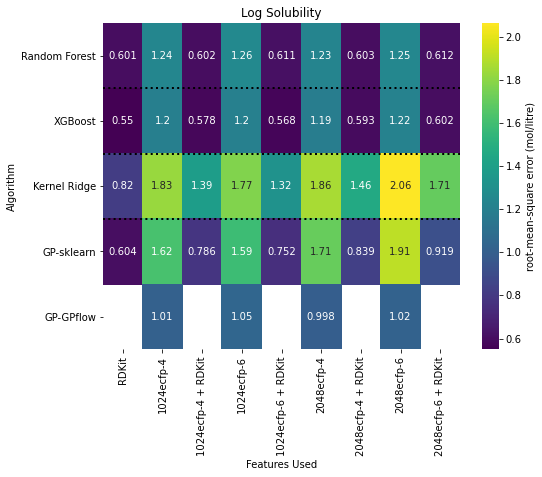

In [34]:
df = combined_val_metric
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

In [35]:
combined_val_metric

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.600959,1.242268,1.263004,1.232053,1.247590,0.601850,0.610560,0.603127,0.611924
xgb,0.550116,1.196102,1.200491,1.187169,1.221795,0.578008,0.568173,0.592631,0.602478
krr,0.820157,1.831391,1.774324,1.864609,2.062440,1.386677,1.323724,1.463234,1.706109
gp,0.603975,1.622110,1.588880,1.708997,1.914532,0.786074,0.752342,0.838613,0.919331
gpflow,NaN,1.014397,1.045926,0.997895,1.018233,NaN,NaN,NaN,NaN


### Scikit-Learn best

In [36]:
best = []
for model in val_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(val_metric.loc[model, val_metric.loc[model] == val_metric.loc[model].min()].index)[0]
    best.append([model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}']])
    print(model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}'])
    print()

xgb RDKit 0.5501161769559048 0.04109036316980578

rf RDKit 0.6009593426848229 0.0378305346933809

gp RDKit 0.6039751640828205 0.022815318279771506

krr RDKit 0.8201574774779243 0.07366423884832891



In [37]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,RDKit,0.550116,0.041090
1,rf,RDKit,0.600959,0.037831
2,gp,RDKit,0.603975,0.022815
3,krr,RDKit,0.820157,0.073664


In [38]:
dataset

'esol'

### Combined

In [39]:
best = []
for model in combined_val_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(combined_val_metric.loc[model, combined_val_metric.loc[model] == combined_val_metric.loc[model].min()].index)[0]
    
    if model != 'gpflow':
        best.append([model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}']])
        print(model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}'])
    else:
        pass
        best.append([model, features, gpflow_mean_val_scores[features][f'test_{metric}'], gpflow_std_val_scores[features][f'test_{metric}']])
        print(model, features, gpflow_mean_val_scores[features][f'test_{metric}'], gpflow_std_val_scores[features][f'test_{metric}'])
    print()

xgb RDKit 0.5501161769559048 0.04109036316980578

rf RDKit 0.6009593426848229 0.0378305346933809

gp RDKit 0.6039751640828205 0.022815318279771506

krr RDKit 0.8201574774779243 0.07366423884832891

gpflow 2048ecfp-4 0.997895238019353 0.01684556136298293



In [40]:
dataset, smile_type, grid_search_type, cf

('esol', 'original', 'extended', 'full')

In [41]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,RDKit,0.550116,0.041090
1,rf,RDKit,0.600959,0.037831
2,gp,RDKit,0.603975,0.022815
3,krr,RDKit,0.820157,0.073664
4,gpflow,2048ecfp-4,0.997895,0.016846


## Test metric

### Scikit-Learn

In [42]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.67,1.21,1.23,1.20,1.18,0.67,0.68,0.67,0.68
xgb,0.64,1.24,1.19,1.18,1.13,0.63,0.61,0.63,0.68
krr,0.87,1.86,1.75,1.94,2.02,1.52,1.39,1.68,1.78
gp,0.66,1.64,1.61,1.78,1.89,0.87,0.83,1.00,1.00


### GPflow

In [43]:
gpflow_test_metric = {features: {'gpflow': gpflow_mean_train_test_scores[features][f'test_{metric}']} for features in gpflow_mean_train_test_scores}
for features in test_metric:
    if features not in gpflow_test_metric:
        gpflow_test_metric[features] = {}
        gpflow_test_metric[features]['gpflow'] = None
gpflow_test_metric = pd.DataFrame(gpflow_test_metric)[test_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_test_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,1.07,1.05,1.04,1.03,None,None,None,None


### Combined

In [44]:
combined_test_metric = pd.concat([test_metric, gpflow_test_metric])
combined_test_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.67,1.21,1.23,1.20,1.18,0.67,0.68,0.67,0.68
xgb,0.64,1.24,1.19,1.18,1.13,0.63,0.61,0.63,0.68
krr,0.87,1.86,1.75,1.94,2.02,1.52,1.39,1.68,1.78
gp,0.66,1.64,1.61,1.78,1.89,0.87,0.83,1.00,1.00
gpflow,NaN,1.07,1.05,1.04,1.03,NaN,NaN,NaN,NaN


### Heatmap

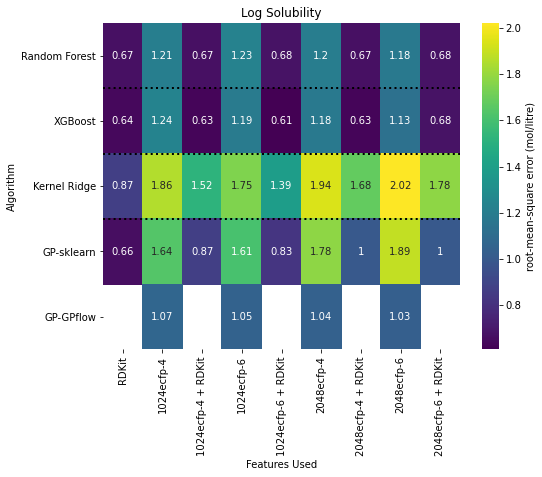

In [68]:
df = combined_test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

In [69]:
combined_test_metric

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.674734,1.210020,1.232659,1.196919,1.180997,0.674738,0.679047,0.669048,0.681571
xgb,0.637167,1.241589,1.191706,1.180189,1.131992,0.634530,0.609122,0.626021,0.679212
krr,0.874215,1.856633,1.754450,1.941671,2.021473,1.517000,1.391965,1.678236,1.777762
gp,0.658735,1.643792,1.606907,1.779559,1.894843,0.872197,0.830794,0.998978,1.003112
gpflow,NaN,1.069009,1.051721,1.043505,1.029373,NaN,NaN,NaN,NaN


## Best feature set for each model

### Scikit-Learn

In [70]:
best = []
for model in test_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(test_metric.loc[model, test_metric.loc[model] == test_metric.loc[model].min()].index)[0]
    best.append([model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}']])
    print(model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}'])
    print()

xgb 1024ecfp-6 + RDKit 0.6091223774168234 0.047678322063773475

gp RDKit 0.6587345637068794 0.03190512512700775

rf 2048ecfp-4 + RDKit 0.6690484342593243 0.0627873087463154

krr RDKit 0.8742146519107542 0.010021229267198725



In [71]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,1024ecfp-6 + RDKit,0.609122,0.047678
1,gp,RDKit,0.658735,0.031905
2,rf,2048ecfp-4 + RDKit,0.669048,0.062787
3,krr,RDKit,0.874215,0.010021


### Combined best

In [72]:
best = []
for model in combined_test_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(combined_test_metric.loc[model, combined_test_metric.loc[model] == combined_test_metric.loc[model].min()].index)[0]
    
    if model != 'gpflow':
        best.append([model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}']])
        print(model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}'])
    else:
        pass
        best.append([model, features, gpflow_mean_train_test_scores[features][f'test_{metric}'], gpflow_std_train_test_scores[features][f'test_{metric}']])
        print(model, features, gpflow_mean_train_test_scores[features][f'test_{metric}'], gpflow_std_train_test_scores[features][f'test_{metric}'])
    print()

xgb 1024ecfp-6 + RDKit 0.6091223774168234 0.047678322063773475

gp RDKit 0.6587345637068794 0.03190512512700775

rf 2048ecfp-4 + RDKit 0.6690484342593243 0.0627873087463154

krr RDKit 0.8742146519107542 0.010021229267198725

gpflow 2048ecfp-6 1.0293729161948013 0.009862302956136965



In [73]:
dataset, smile_type, grid_search_type, cf

('esol', 'original', 'extended', 'full')

In [74]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,1024ecfp-6 + RDKit,0.609122,0.047678
1,gp,RDKit,0.658735,0.031905
2,rf,2048ecfp-4 + RDKit,0.669048,0.062787
3,krr,RDKit,0.874215,0.010021
4,gpflow,2048ecfp-6,1.029373,0.009862


# Creating a table with all the scores (only makes sence for reproducing or particular feature set)

## Train and test scores data frame

In [52]:
train_test_means_df = pd.DataFrame(mean_train_test_scores['1024ecfp-4']).T
train_test_stds_df = pd.DataFrame(std_train_test_scores['1024ecfp-4']).T

train_test_stds_df

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r
rf,3.355469,0.027206,0.088998,0.013024,0.060264,0.003688,0.064678,0.003227,0.040535,0.001328
xgb,5.827420,0.001834,0.003302,0.019217,0.038317,0.003801,0.022714,0.002565,0.015186,0.001290
krr,0.045215,0.006581,0.086736,0.020814,0.077624,0.003030,0.108555,0.002497,0.080168,0.001257
gp,0.748089,0.007753,0.031950,0.017498,0.031545,0.011806,0.039370,0.011408,0.035539,0.003177


## Validation scores data frame

### Changing col names to 'val_\*' form 'test_\*'

In [53]:
val_means_df = pd.DataFrame(mean_val_scores['1024ecfp-4']).T
val_stds_df = pd.DataFrame(std_val_scores['1024ecfp-4']).T

val_stds_df

,fit_time,score_time,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,2.837354,0.027328,0.017910,0.008003,0.033406,0.023508
xgb,5.007012,0.001603,0.016791,0.032181,0.035353,0.023527
krr,0.039165,0.005996,0.137349,0.075659,0.200282,0.108097
gp,4.592598,0.004381,0.020725,0.010343,0.038837,0.057407


In [54]:
val_means_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df

,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,0.017910,0.008003,0.033406,0.023508
xgb,0.016791,0.032181,0.035353,0.023527
krr,0.137349,0.075659,0.200282,0.108097
gp,0.020725,0.010343,0.038837,0.057407


In [55]:
col_names = list(val_means_df.columns)
col_names

['test_RMSE', 'test_MAE', 'test_R^2', 'test_pearson_r']

In [56]:
new_col_names = []
for name in col_names:
    new_col_names.append(name.replace("test", "val"))
    
new_col_names

['val_RMSE', 'val_MAE', 'val_R^2', 'val_pearson_r']

### Ready validation data frame

In [57]:
val_means_df.columns = new_col_names
val_stds_df.columns = new_col_names

val_stds_df

,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,0.017910,0.008003,0.033406,0.023508
xgb,0.016791,0.032181,0.035353,0.023527
krr,0.137349,0.075659,0.200282,0.108097
gp,0.020725,0.010343,0.038837,0.057407


## All scores

In [58]:
all_means = pd.concat([train_test_means_df, val_means_df], axis = 1)
all_stds = pd.concat([train_test_stds_df, val_stds_df], axis = 1)

all_stds

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,3.355469,0.027206,0.088998,0.013024,0.060264,0.003688,0.064678,0.003227,0.040535,0.001328,0.017910,0.008003,0.033406,0.023508
xgb,5.827420,0.001834,0.003302,0.019217,0.038317,0.003801,0.022714,0.002565,0.015186,0.001290,0.016791,0.032181,0.035353,0.023527
krr,0.045215,0.006581,0.086736,0.020814,0.077624,0.003030,0.108555,0.002497,0.080168,0.001257,0.137349,0.075659,0.200282,0.108097
gp,0.748089,0.007753,0.031950,0.017498,0.031545,0.011806,0.039370,0.011408,0.035539,0.003177,0.020725,0.010343,0.038837,0.057407


In [59]:
col_order = ['fit_time', 'score_time']
temp = [[f'train_{metric}', f'val_{metric}', f'test_{metric}'] for metric in metrics_to_labels]

for l in temp:
    col_order.extend(l)
    
col_order

['fit_time',
 'score_time',
 'train_RMSE',
 'val_RMSE',
 'test_RMSE',
 'train_MAE',
 'val_MAE',
 'test_MAE',
 'train_R^2',
 'val_R^2',
 'test_R^2',
 'train_pearson_r',
 'val_pearson_r',
 'test_pearson_r']

In [60]:
all_means = all_means[col_order]
all_stds = all_stds[col_order]

all_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,3.355469,0.027206,0.013024,0.017910,0.088998,0.003688,0.008003,0.060264,0.003227,0.033406,0.064678,0.001328,0.023508,0.040535
xgb,5.827420,0.001834,0.019217,0.016791,0.003302,0.003801,0.032181,0.038317,0.002565,0.035353,0.022714,0.001290,0.023527,0.015186
krr,0.045215,0.006581,0.020814,0.137349,0.086736,0.003030,0.075659,0.077624,0.002497,0.200282,0.108555,0.001257,0.108097,0.080168
gp,0.748089,0.007753,0.017498,0.020725,0.031950,0.011806,0.010343,0.031545,0.011408,0.038837,0.039370,0.003177,0.057407,0.035539


In [61]:
# # making rmse, mae positive

# for subset in ['train', 'val', 'test']:
#     for metric in ['RMSE', 'MAE']:
#         all_means[f'{subset}_{metric}'] = np.abs(all_scores[f'{subset}_{metric}'])

## Presentable version

In [62]:
presentable_all_means = np.round(all_means, 3)
presentable_all_stds = np.round(all_stds, 3)

In [63]:
print(dataset, smile_type, grid_search_type)

print('\nMeans:')
display(presentable_all_means)

print('Standard deviations:')
display(presentable_all_stds)

esol original extended

Means:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,14.972,0.119,0.477,1.242,1.210,0.335,0.919,0.914,0.948,0.631,0.688,0.979,0.804,0.833
xgb,30.370,0.010,0.281,1.196,1.242,0.136,0.874,0.928,0.982,0.658,0.676,0.991,0.818,0.831
krr,0.227,0.029,0.256,1.831,1.857,0.072,1.340,1.327,0.985,0.183,0.272,0.992,0.601,0.636
gp,22.014,0.129,1.174,1.622,1.644,0.902,1.257,1.305,0.683,0.372,0.433,0.931,0.729,0.765


Standard deviations:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,3.355,0.027,0.013,0.018,0.089,0.004,0.008,0.060,0.003,0.033,0.065,0.001,0.024,0.041
xgb,5.827,0.002,0.019,0.017,0.003,0.004,0.032,0.038,0.003,0.035,0.023,0.001,0.024,0.015
krr,0.045,0.007,0.021,0.137,0.087,0.003,0.076,0.078,0.002,0.200,0.109,0.001,0.108,0.080
gp,0.748,0.008,0.017,0.021,0.032,0.012,0.010,0.032,0.011,0.039,0.039,0.003,0.057,0.036


In [64]:
presentable_all_means_stds = presentable_all_means.copy()
for i in presentable_all_means_stds.index:
    for j in presentable_all_means_stds.columns:
        presentable_all_means_stds.loc[i, j] = str(presentable_all_means.loc[i, j]) + ' +/- ' + str(presentable_all_stds.loc[i, j])
        
presentable_all_means_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,14.972 +/- 3.355,0.119 +/- 0.027,0.477 +/- 0.013,1.242 +/- 0.018,1.21 +/- 0.089,0.335 +/- 0.004,0.919 +/- 0.008,0.914 +/- 0.06,0.948 +/- 0.003,0.631 +/- 0.033,0.688 +/- 0.065,0.979 +/- 0.001,0.804 +/- 0.024,0.833 +/- 0.041
xgb,30.37 +/- 5.827,0.01 +/- 0.002,0.281 +/- 0.019,1.196 +/- 0.017,1.242 +/- 0.003,0.136 +/- 0.004,0.874 +/- 0.032,0.928 +/- 0.038,0.982 +/- 0.003,0.658 +/- 0.035,0.676 +/- 0.023,0.991 +/- 0.001,0.818 +/- 0.024,0.831 +/- 0.015
krr,0.227 +/- 0.045,0.029 +/- 0.007,0.256 +/- 0.021,1.831 +/- 0.137,1.857 +/- 0.087,0.072 +/- 0.003,1.34 +/- 0.076,1.327 +/- 0.078,0.985 +/- 0.002,0.183 +/- 0.2,0.272 +/- 0.109,0.992 +/- 0.001,0.601 +/- 0.108,0.636 +/- 0.08
gp,22.014 +/- 0.748,0.129 +/- 0.008,1.174 +/- 0.017,1.622 +/- 0.021,1.644 +/- 0.032,0.902 +/- 0.012,1.257 +/- 0.01,1.305 +/- 0.032,0.683 +/- 0.011,0.372 +/- 0.039,0.433 +/- 0.039,0.931 +/- 0.003,0.729 +/- 0.057,0.765 +/- 0.036


# Save results to csv files

In [65]:
if grid_search_type == 'reproducing':
    presentable_all_means.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means.csv', index=True)
    presentable_all_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_stds.csv', index=True)
    presentable_all_means_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds.csv', index=True)
else:
    pass